In [24]:
import pandas as pd 
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# set some styling defaults for matplotlib
plt.style.use("seaborn-talk")
mpl.rcParams["figure.dpi"] = 90  # change this to set apparent figure size
mpl.rcParams["figure.figsize"] = (10, 4)
mpl.rcParams["figure.frameon"] = False

%matplotlib notebook

# set decimal precision to 3 dec. places
%precision 3
import arviz as az

# Example 5: Bayesian visualsiation
## Outcomes
You will know how to:

* How to explore and visualise posterior distributions that result from Bayesian analysis.
* Use basic visualisations of uncertainty to represent distributions.
* How to apply animation in representing distributions.
* Use interaction to explore posterior distributions by conditioning on variables.

## Goals

## Task
We will visualise the results of the hierarchical model of Fitts' law that included per-participant a,b coefficients. This is a relatively simple model, but it can still be hard to understand the implications of the posterior distribution that results from a Bayesian analysis. This is because the joint posterior distribution has many dimensions, and they may not be independent of each other (in fact, we'd expect they would *not* be, if we learned something interesting in the inference).

## Process

## Package
We'll use a mix of `seaborn`, `matplotlib`, `arviz` and `ipywidgets`

## Setup
We'll load the posterior distribution from the very end of the Bayesian analysis example. I've stored this in a CSV file, ready for use:

In [25]:
posterior_trace = pd.read_csv("fitts_pooled_model.csv")
posterior_trace.head()

,Unnamed: 0,chain,draw,a_pop,b_pop,"('a[0]', 0)","('a[10]', 10)","('a[11]', 11)","('a[12]', 12)","('a[13]', 13)",...,"('b[3]', 3)","('b[4]', 4)","('b[5]', 5)","('b[6]', 6)","('b[7]', 7)","('b[8]', 8)","('b[9]', 9)",a_std,b_std,sigma
0,0,0,0,0.097023,0.449465,0.079901,0.086335,0.147441,0.088082,0.091806,...,0.458665,0.451356,0.441424,0.480437,0.416488,0.360347,0.484242,0.031364,0.029187,0.272775
1,1,0,1,0.146047,0.458619,0.176788,0.145958,0.159858,0.200202,0.088001,...,0.466765,0.402961,0.467434,0.383166,0.386574,0.413256,0.524601,0.044858,0.048284,0.284568
2,2,0,2,0.059800,0.455439,0.064682,0.065572,0.055272,-0.001955,0.088050,...,0.426806,0.454122,0.463540,0.450960,0.414500,0.334478,0.471178,0.035794,0.067960,0.289561
3,3,0,3,0.121165,0.468225,0.137517,0.100860,0.152158,0.161005,0.083828,...,0.496764,0.424667,0.475894,0.422446,0.425788,0.456070,0.517653,0.051802,0.040986,0.282327
4,4,0,4,0.077962,0.426009,0.060586,0.095858,0.055584,0.052325,0.098899,...,0.451750,0.420179,0.460593,0.450439,0.406187,0.332460,0.488580,0.026527,0.060289,0.278215


For the moment, we'll just focus on representing $b$, the slope of the MT:ID line.

## Applying

### Static

In [26]:
# extract the b columns
# from a dataframe
def extract_b_cols(df):
    extracted_b = df.filter(regex="\(\'b\[*")
    extracted_b = extracted_b.rename(columns=lambda x:(int(x[-3:-1])))
    extracted_b = extracted_b.reindex(sorted(extracted_b.columns), axis=1)
    extracted_b = extracted_b.to_dict('list')
    return extracted_b

extracted_b = extract_b_cols(posterior_trace)

The worst thing, as always, is just to show means:

<IPython.core.display.Javascript object>


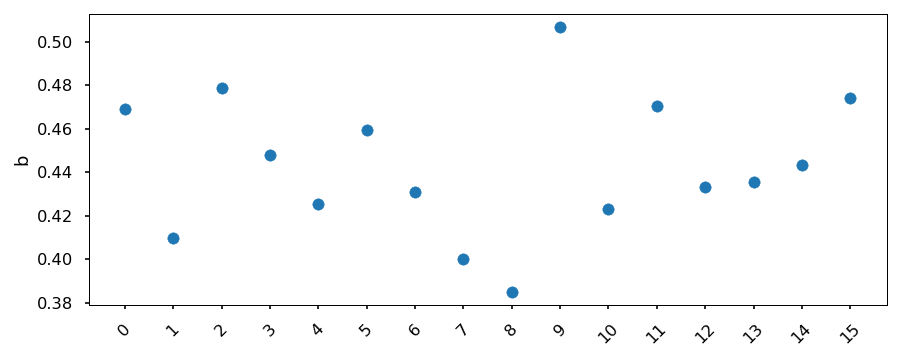

In [27]:
def rotate_labels():
    ax = plt.gca()
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
    plt.tight_layout()
 

def show_samples_mean(samples):
    fig, ax = plt.subplots()    
    ax.scatter(np.arange(len(samples)), [np.mean(v) for v in samples.values()])
    ax.set_xticks(np.arange(len(samples)))
    ax.set_xticklabels(samples.keys())
    ax.set_ylabel("b")
    rotate_labels()
    
show_samples_mean(extracted_b)

<IPython.core.display.Javascript object>


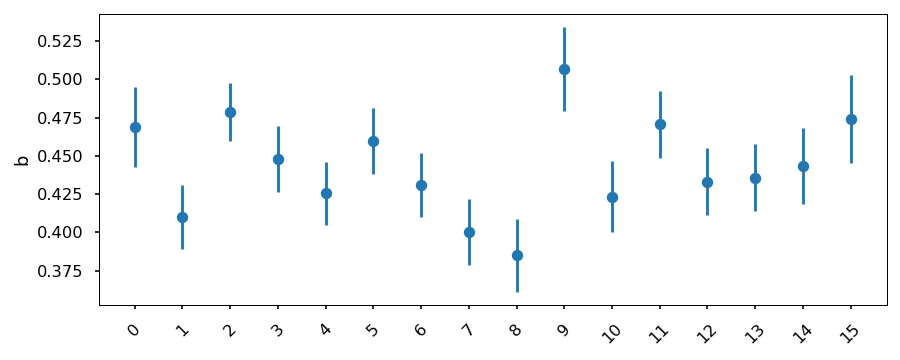

In [29]:
def show_samples_mean_error(samples):
    fig, ax = plt.subplots()    
    ax.errorbar(np.arange(len(samples)),  [np.mean(v) for v in samples.values()], yerr=[np.std(v) for v in samples.values()], fmt='o')
    ax.set_xticks(np.arange(len(samples)))
    ax.set_xticklabels(samples.keys())
    ax.set_ylabel("b")
    rotate_labels()
    
show_samples_mean_error(extracted_b)

<IPython.core.display.Javascript object>


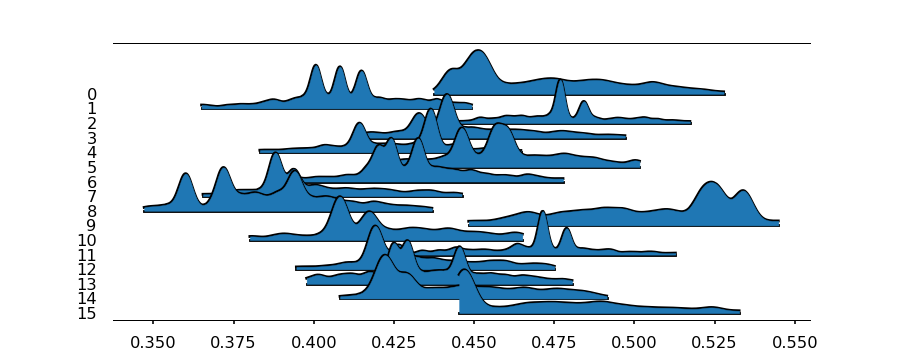

array([<AxesSubplot:>], dtype=object)

In [30]:
az.plot_forest(extracted_b, kind="ridgeplot", ridgeplot_overlap=8, figsize=(10, 4), colors='cycle')

In [31]:
    
def show_samples_box(products):
    fig, ax = plt.subplots()
    samps = products
    ax.boxplot(samps.values(), labels=samps.keys())
    ax.set_ylabel("b")
    rotate_labels()

def show_samples_violin(products):
    fig, ax = plt.subplots()
    samps = products
    sns.violinplot(data=list(samps.values()), scale="width")
    ax.set_xticklabels(samps.keys())    
    ax.set_ylabel("b")
    rotate_labels()

    
def show_samples_raw(products):
    fig, ax = plt.subplots()
    samps = products
    x = 0
    for name, values in samps.items():
        values = np.array(values)
        ax.scatter(0*values+x, values, marker='_', alpha=0.1, c='C1')
        x += 1
        
        
    ax.set_xticklabels(samps.keys())    
    ax.set_ylabel("b")
    rotate_labels()

def show_samples_swarm(products):
    fig, ax = plt.subplots()
    samps = products
    data = np.array(list(samps.values()))[:,::50]
    data += np.random.normal(0,0.01,data.shape)
    
    
    sns.swarmplot(data=list(data))
    ax.set_xticklabels(samps.keys())    
    ax.set_ylabel("b")    
    rotate_labels()
    
def show_samples_strip(products):
    fig, ax = plt.subplots()
    x = 0
    ax.set_xlim(-0.1,len(products)/5)
    ax.set_ylim(0,1)    
    for product, samples in products.items():
        pdf = ss.gaussian_kde(samples)
        xs = np.linspace(0.2,0.6,512)
        cs = np.sqrt(pdf(xs))
        ax.imshow(6-np.tile(cs[None, :], (8, 1)).T, cmap='gray', vmin=0, vmax=6, 
                   extent=[x, x+0.1, 0, 1], origin='lower')
        ax.text(x, -0.3, product, rotation=45, ha='center')        
        x += 0.2
        
        rotate_labels()
    
    ax.set_ylabel("b") 
    

def update_strip(ax, products):
    x = 0
    for product, samples in products.items():
        pdf = ss.gaussian_kde(samples)
        xs = np.linspace(0.2,0.6,512)
        cs = np.sqrt(pdf(xs))
        ax.imshow(6-np.tile(cs[None, :], (8, 1)).T, cmap='gray', vmin=0, vmax=6, 
                   extent=[x, x+0.1, 0, 1], origin='lower')
        x += 0.2
    
    

<IPython.core.display.Javascript object>


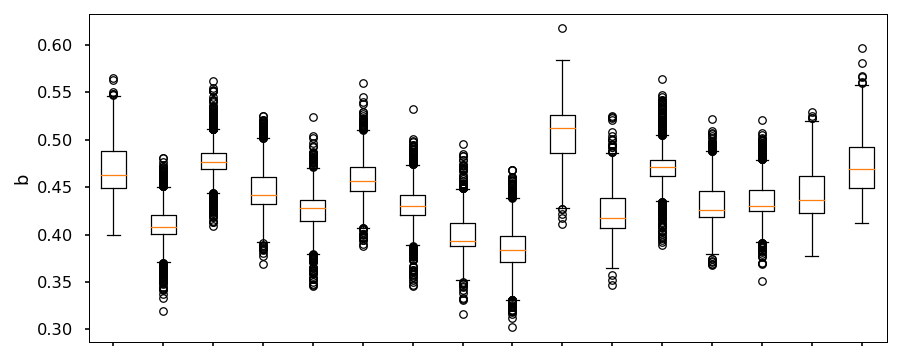

In [32]:
show_samples_box(extracted_b)

<IPython.core.display.Javascript object>


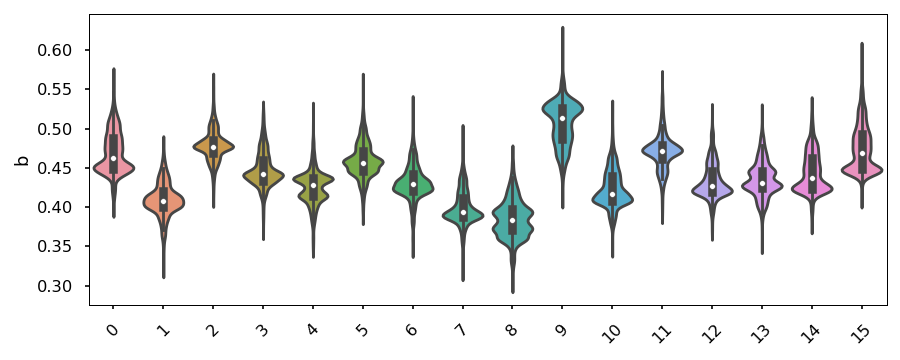

In [33]:
show_samples_violin(extracted_b)

<IPython.core.display.Javascript object>


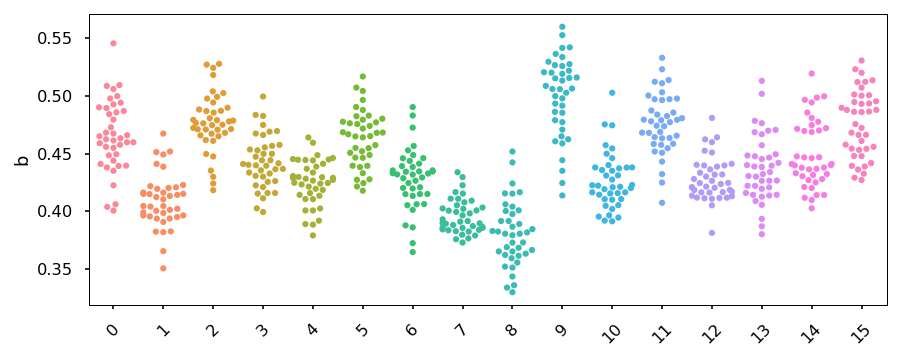

C:\local\anaconda3\envs\pymc3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\local\anaconda3\envs\pymc3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\local\anaconda3\envs\pymc3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\local\anaconda3\envs\pymc3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\local\anaconda3\envs\pymc3\lib\site-packages\seaborn\categorical.py:1296: UserWarn

In [15]:
show_samples_swarm(extracted_b)

<IPython.core.display.Javascript object>


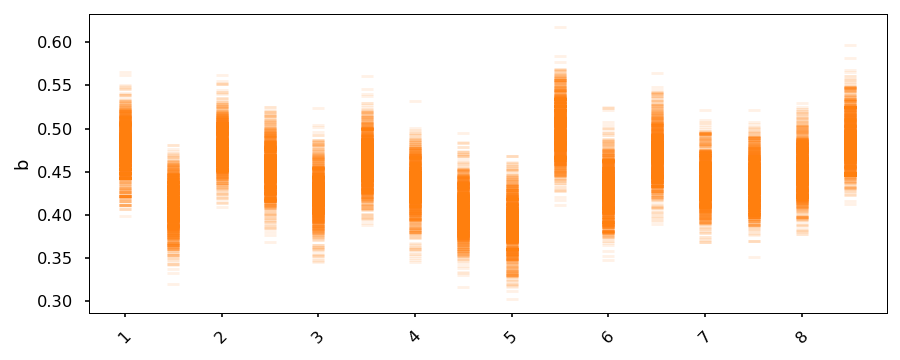

C:\Users\John\AppData\Local\Temp/ipykernel_23640/559328753.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(samps.keys())
C:\Users\John\AppData\Local\Temp/ipykernel_23640/2238302205.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)


In [16]:
show_samples_raw(extracted_b)

<IPython.core.display.Javascript object>


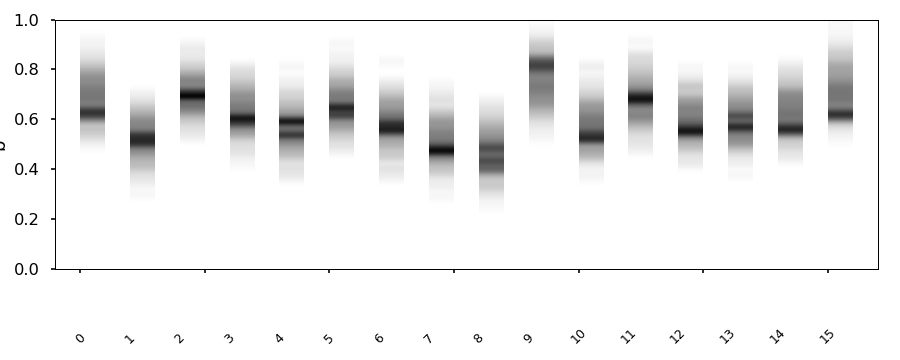

C:\Users\John\AppData\Local\Temp/ipykernel_23640/2238302205.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)


In [17]:
show_samples_strip(extracted_b);

## Animated

### Hypothetical outcome plots
A hypothetical outcome plot or HOP is an animated plot showing definite samples drawn from a distribution over time. This gives a more immediate sense of the variation, and has been shown to improve judgments under uncertainty in some settings.

In [36]:
from matplotlib.animation import FuncAnimation

def show_HOP(products):
    fig, ax = plt.subplots()
    samps = products
    x = 0
    
    hops = []
    all_values = []
    for name, values in samps.items():
        values = np.array(values)
        vs = values[0:1]
        hop, = ax.plot(0*vs+x, vs, 'o', alpha=1, c='C1')
        hops.append(hop)
        ax.set_ylim(0.3, 0.7)
        
        all_values.append(values)
        x += 1
        
    def animate(frame):
        for hop, vs in zip(hops, all_values):        
            hop.set_ydata([np.random.choice(vs, 1)])
        
            
            
    ax.set_xticklabels(samps.keys())    
    ax.set_ylabel("b")
    rotate_labels()
    
    anim = FuncAnimation(fig, animate, frames=200, interval=50)
    return anim

anim = show_HOP(extracted_b)    


<IPython.core.display.Javascript object>

C:\Users\John\AppData\Local\Temp/ipykernel_23640/2454696129.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(samps.keys())
C:\Users\John\AppData\Local\Temp/ipykernel_23640/2238302205.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)


### Ballistic HOPs
The jumpy nature of HOPs reflects the unordered nature of the samples. We can artificially order the samples and add some pseudo-physical "springyness" to the animation to generate a plot that looks as if we "plucked" the dataset and saw the samples echo around the posterior.

<IPython.core.display.Javascript object>


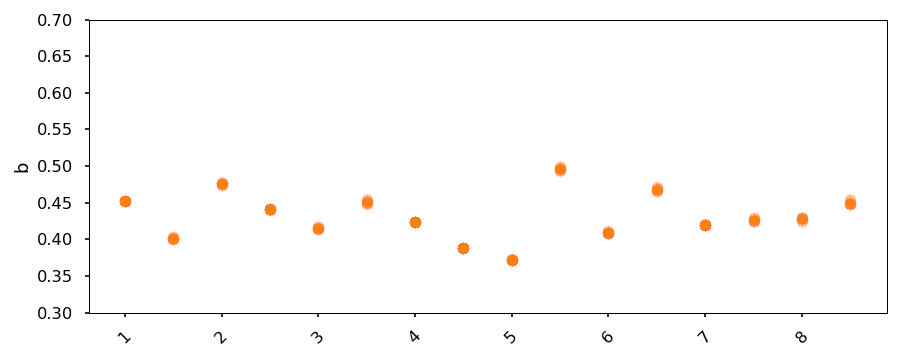

C:\Users\John\AppData\Local\Temp/ipykernel_23640/2385692675.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(samps.keys())
C:\Users\John\AppData\Local\Temp/ipykernel_23640/2238302205.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)


In [35]:
def show_ballistic_HOP(products):
    fig, ax = plt.subplots()
    
    x = 0
    samps = {name:np.array(sorted(samples)) for name, samples in products.items()}
        
    hops = []
    all_values = []
    for name, values in samps.items():        
        vs = values[0:1]
        hop, = ax.plot(0*vs+x, vs, 'o', alpha=0.01, c='C1')
        ax.set_ylim(0.3, 0.7)
        hops.append(hop)
        all_values.append(values)
        x += 1
        
    def animate(frame):
        for hop, vs in zip(hops, all_values):        
            index = np.cos(frame * 0.4) * np.exp(-frame * 0.015) * 850 + 1000            
            hop.set_ydata(vs[int(index):int(index+150)])                                
            
    ax.set_xticklabels(samps.keys())    
    ax.set_ylabel("b")
    rotate_labels()
    
    anim = FuncAnimation(fig, animate, frames=250, interval=10)
    return anim

anim = show_ballistic_HOP(extracted_b)    


## Interactive
Posteriors are high-dimensional, and we can't show every aspect of the joint distribution at once in a single plot. One way to mitigate that is to slice (or stratify) the joint posterior distribution interactively. This allows *conditional* relationships in a posterior to be obtained.

### Slicing posteriors

In [21]:
from ipywidgets import  interactive



def make_slicer(var_name, strat_width=0.01):
    show_samples_strip(extracted_b)
    def show_slice(**kwargs):
    
        stratum = posterior_trace[np.abs(posterior_trace[var_name]-kwargs[var_name])<strat_width]    
        extracted_b_stratum = extract_b_cols(stratum)    
        if len(extracted_b_stratum)>3:
            update_strip(plt.gca(), extracted_b_stratum)
    
        plt.gcf().canvas.draw()
    return show_slice

<IPython.core.display.Javascript object>


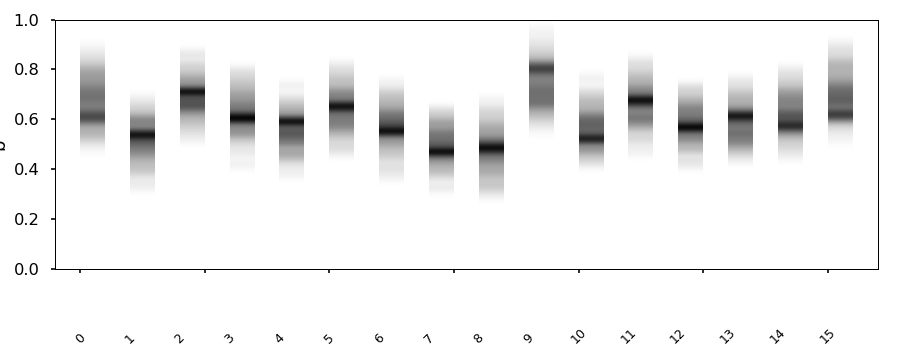

C:\Users\John\AppData\Local\Temp/ipykernel_23640/2238302205.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)


interactive(children=(FloatSlider(value=0.44, description='b_pop', max=0.55, min=0.33, step=0.01), Output()), …

In [22]:
    
interactive(make_slicer("b_pop"), b_pop = (0.33, 0.55, 0.01))

<IPython.core.display.Javascript object>


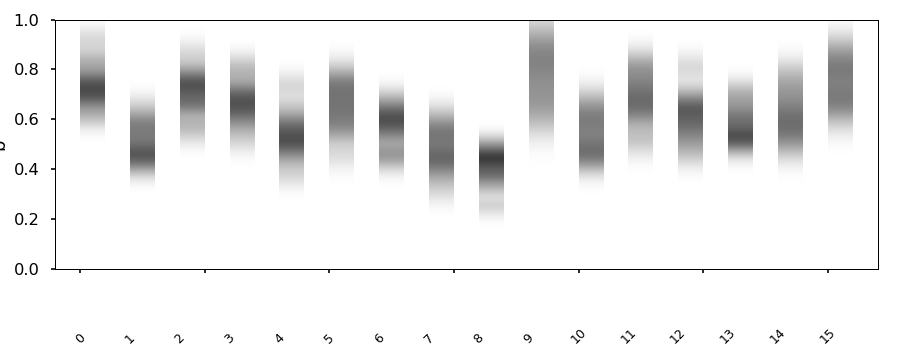

C:\Users\John\AppData\Local\Temp/ipykernel_23640/2238302205.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)


interactive(children=(FloatSlider(value=0.041, description='b_std', max=0.1, min=0.001, step=0.01), Output()),…

In [23]:
interactive(make_slicer("b_std", 0.002), b_std = (0.001, 0.1, 0.01))

## Reflection

### What was gained?
* We could visualise the uncertainty and quantify our confidence in the estimates
* Animation helps spread out the information over time, and also brings a visceral sense of variation
* Interaction can help reduce "slice" up the posterior into more manageable chunks, and give a clearer sense of *conditional* relationships within a posterior.

### What were the challenges?
* Lots of choices for visualisation of uncertainty, and not always obvious which one to use
* Scaling to a posterior with more dimensions would be challenging to do
* Even with these techniques, its obvious the posterior of even a simple Bayesian analysis can be quite complex to deal with.

### What else could we have done
* We only looked at representations of single dimensions (albeit multiple dimensions at once). 2D and 3D representations can be important (e.g. displaying cursor uncertainty).
* We could have used ML to reduce the dimensionality of our posterior (e.g. via UMAP or tSNE)
* We could have made more sophisticated interactions
* We could have suggested interactive tours of the posterior to show (as in the ballistic HOP example)
